# **Customer Segmentation using K-means Clustering**

In [1]:
from google.colab import files

# This will open a file upload dialog
uploaded = files.upload()

Saving churn-bigml-20.csv to churn-bigml-20.csv


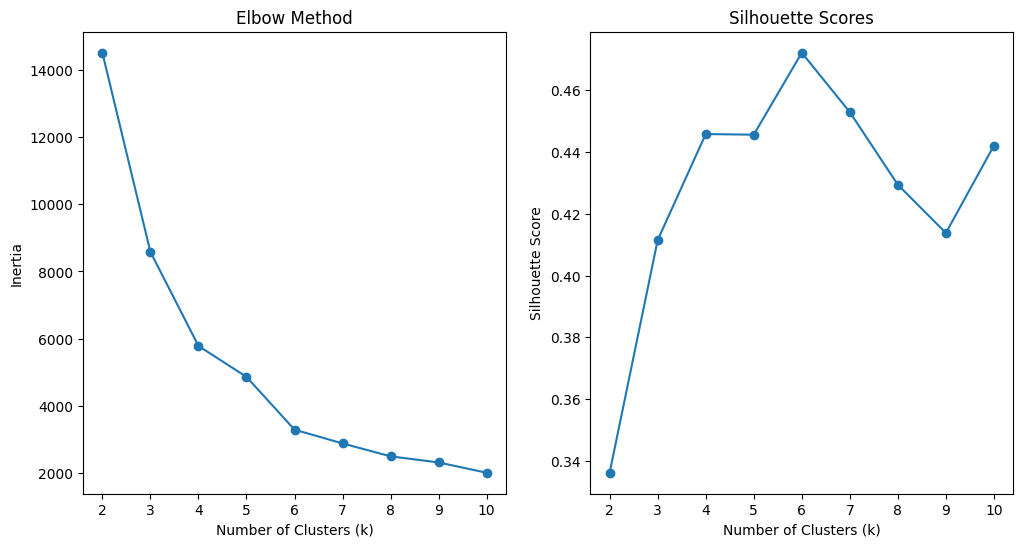

         SeniorCitizen     tenure  MonthlyCharges
Cluster                                          
0                  0.0  20.043783       44.590907
1                  0.0  50.705731       88.145573
2                  1.0  33.295972       79.820359


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data Cleaning
data.dropna(inplace=True)  # Remove missing values
data = data.select_dtypes(include=[np.number])  # Keep only numerical features

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plotting the Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plotting Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Fit the final model with the optimal k
optimal_k = 3  # Assume 3 is the optimal number from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the original data
data['Cluster'] = clusters

# Analyze the clusters
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)

## **Churn** **Prediction**

In [4]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
[[947  86]
 [210 164]]
              precision    recall  f1-score   support

       False       0.82      0.92      0.86      1033
        True       0.66      0.44      0.53       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.77      1407



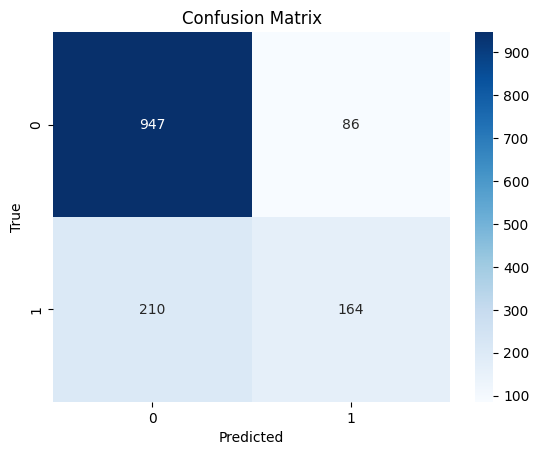

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the uploaded CSV file
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data Preprocessing
# Check for missing values
print(data.isnull().sum())

# Convert TotalCharges to numeric (it may have spaces)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Drop rows with missing values
data.dropna(inplace=True)

# Convert categorical variables to numerical
data = pd.get_dummies(data, drop_first=True)

# Define features and target variable
X = data.drop('Churn_Yes', axis=1)  # Features
y = data['Churn_Yes']                # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Visualizing the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()